# **AP155 Lab Assignment**
## Module 6: Random Process and Monte Carlo Methods

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: BALEJADO, Venser H.\
_Student No._: 2022-13875\
_Section_: THV-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: 11-30-24  04:30 pm

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: VENSER HALILI BALEJADO**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: <font color='red'>**100/100**</font>

Score breakdown:
* Problem 1 - <font color='red'>**100/100**</font>

<font color='red'>**signed GC Belinario**</font>

### PROBLEM 1

**The Ising model**

_Refer to Exercise 10.9 in the Newman text._ The Ising model is a theoretical model of a magnet. The magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_i s_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_i s_j$, where $J$ is a positive interaction constant. The minus sign ensures that the in- teractions are ferromagnetic, meaning the energy is lower when dipoles are lined up. A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$
where the notation $\langle ij \rangle$ indicates a sum over pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts, except for the spins at the edges of the lattice, which have either two or three neighbors.

Perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 x 20 spins. You will need to set up variables to hold the value ±1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.

1. Write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions $s_i s_j$ from all of them, then multiply by $-J$. Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term $-Js_1s_2$ if spins 1 and 2 are adjacent to one another, but you do not also need a term $-Js_2s_1$. Hint 2: To make your final program to run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python's ability to do arithmetic with entire arrays at once. If you do the calculation step by step, your program will be significantly slower. *(25 pts.)*

2. Now use your function as the basis for a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1. Initially set the spin variables randomly to ±1, so that on average about a half of them are up and a half down, giving a total magneti- zation of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula, Eq. (10.60). If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spip. Now repeat this process for many moves. *(25 pts.)*

3. Make a plot of the total magnetization $M = \sum_i s_i$ of the system as a function of time for a million Monte Carlo steps. You should see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization. Hint: While you are working on your program, do shorter runs, of maybe ten thousand steps at a time. Once you have it working properly, do a longer run of a million steps to get the final results. *(25 pts.)*

4. Run your program several times and observe the sign of the magnetization that develops, positive or negative. Describe what you find and give a brief explanation of what is happening. *(25 pts.)*

## Solution

### Change in Total Magnetization

The total magnetization is calculated as:

$$M = \sum_{ij}^N s_{ij}$$

Changing the flip at $[m,n]:s_{mn} = s_{mn} * (-1)$

$$\Delta M = M_{new} - M_{old} = -2s_{mn}$$

alternatively, in running the summation for each state, we only need to solve the change in the total magnetization and add it to that of the previous state because the total magnetization of each new state is equal to the equation:

$$ M_{new} = M_{old} + \Delta M$$

### Change in Total Energy

Let $s_{ij}$ be the spin of the dipole at the i-th row and j-th column. Each dipole has a aspin of either +$1$ or -$1$:
$$s_{ij} \in \{-1, +1\}$$

Let $[m,n]$ be the position of the dipole that we want to flip. Flipping the spin at $[m,n]: s_{mn,new} = s_{mn} * (-1)$
$$\Delta E = E_{new} - E_{odd} = -J(-2s_{mn}s_{m-1,n}-2s_{mn}s_{m+1,n}-2s_{mn}s_{m,n-1}-2s_{mn}s_{m,n+1})$$
$$\Delta E = 2J(s_{mn}s_{m-1,n}+s_{mn}s_{m+1,n}+s_{mn}s_{m,n-1}+s_{mn}s_{m,n+1})$$

To obtain the toal energy of the new state we only need to solve for the change in energy after the random spin change.

### Acceptance Probability

Equation 10.60: The Acceptance probability is given by
$$P_a = \begin{cases}
1 & E_j \leq E_i \\
e^{-\beta(E_j-E_i)} & E_j > E_i
\end{cases}$$
Where $\beta$ is the Boltzmann probability constant, $E_j$ is the new state and $E_i$ is the current state.

The acceptance probability can be expressed using the change in total energy as follows
$$P_a = \begin{cases}
1 & \Delta E \leq 0 \\
e^{-\beta(\Delta E)} & \Delta E > 0
\end{cases}$$
Where
$$\Delta E = 2J(s_{mn}s_{m-1,n}+s_{mn}s_{m+1,n}+s_{mn}s_{m,n-1}+s_{mn}s_{m,n+1})$$

In [13]:
import numpy as np                     # for computating numerically and large arrays
import matplotlib.pyplot as plt        # for plotting
from math import exp                   # importing exponential function
from random import random, randint     # for generating random numbers

# Defining constants
L = 20    # sets the size of the lattice for the Ising model. Larger lattice accounts for more accurate simulation results 
k_B = 1   # Boltzmann constant


# defining a new state to initialize the lattice state for our simulation
def new_state(L, rng_seed): # sets the size of the lattice and the seed as parameter
  # we input a seed to ensure the the random number generated is reproducible
  # so, we onstruct a new Random Generator (numpy) using the specified seed
  rng = np.random.default_rng(rng_seed) 
  return rng.choice([-1, 1], size=(L,L))    # Generates an L by L array with elements randomly set to either -1 or +1

# We define the function to compute for the total energy of the spin configuration
def Total_E(arr, J): # we use an arr to set the lattice of spins and J will be the coupling constant defining the interaction strength between adjacent spins
  L = arr[0].size    # this will retrieve the size of the lattice
  sum = 0            # we initialize the sum to 0 to store the cumulative contribution of spin interations to the total energy
  for i in range(L-1): # a for loop iterating over from 0 to L-2 component of the lattice
    sum += arr[i,:] @ arr[i+1,:] + arr[:,i] @ arr[:,i+1]    # dot product of adjacent rows and adjacent columns by iterating over ros and columns
  return -J * sum # we multiply the sum by -J to define the interaction energy of the Ising system

# Defining a function for calculating the difference in total energy after a spin flip
def Energy_difference(arr, J, L, m, n): # arr is the lattice of the spins, J is the coupling constant, L is the size of the lattice, (m,n) is the coordinates of the spin to be flipped 
  E_change = 0
# this function calculates the energy contribution from adjacent spins like above, below, right, and left using boundary checks
  if m > 0:   # boundary check # 1
    E_change += arr[m-1, n]
  if m < L-1: # boundary check # 2
    E_change += arr[m+1, n]
  if n > 0:   # boundary check # 3
    E_change += arr[m, n-1]
  if n < L-1: # boundary check # 4
    E_change += arr[m, n+1]

  E_change *= 2 * J * arr[m, n] # this computes the energy difference caused by a flip
  return E_change
# This funtion allows us to calculate how flipping a single spin changes our total energy

# Implementing the Monte Carlo Markov Chain (MCMC) Algorithm to simulate thermal equilibrium in the Ising model
def MCMC(spins, J, T, steps, rng_seed = 328):
    # in here we defined some reoccuring parameters such as spins and coupling constant
    # we also defined T - temperature, steps - number of Monte Carlo steps, and rng_seeds - for reproducible random numbers (328 in this case)
  beta = 1/(k_B * T)    # Calculate the Boltzmann probability constant

  # Construct a new Random Generator (numpy) using the specified seed
  rng = np.random.default_rng(rng_seed)

  L = spins[0].size             # size of the square spin system

  total_E = Total_E(spins, J)   # Calculate the total Energy of the initial state
  total_M = np.sum(spins)       # Calculate the total Magnetization of the initial state
  M_data = [total_M]            # data of the total magnetization per step

  # Repeat the Monte Carlo step multiple times
  for i in range(steps):
    # Choose a random position for the spin flip
    m, n = rng.integers(L), rng.integers(L)

    # Calculate change in total Energy of the new state from flipping
    dE = Energy_difference(spins, J, L, m, n)

    # Check whether to accept the flip
    if (dE <= 0) or (rng.random() <= exp(-beta*dE)): #This accepts the flip if dE is less than or equal zero
      spins[m, n] *= -1            # Apply the flip change
      total_M += 2 * spins[m, n]   # Update the total magnetization
      total_E += dE                # Update the total Energy

    M_data.append(total_M)   # Add the total Magnetization of the new state to the data
  return spins, M_data
    # this functon will result to the final spin configuration and the magnetization history which we can plot

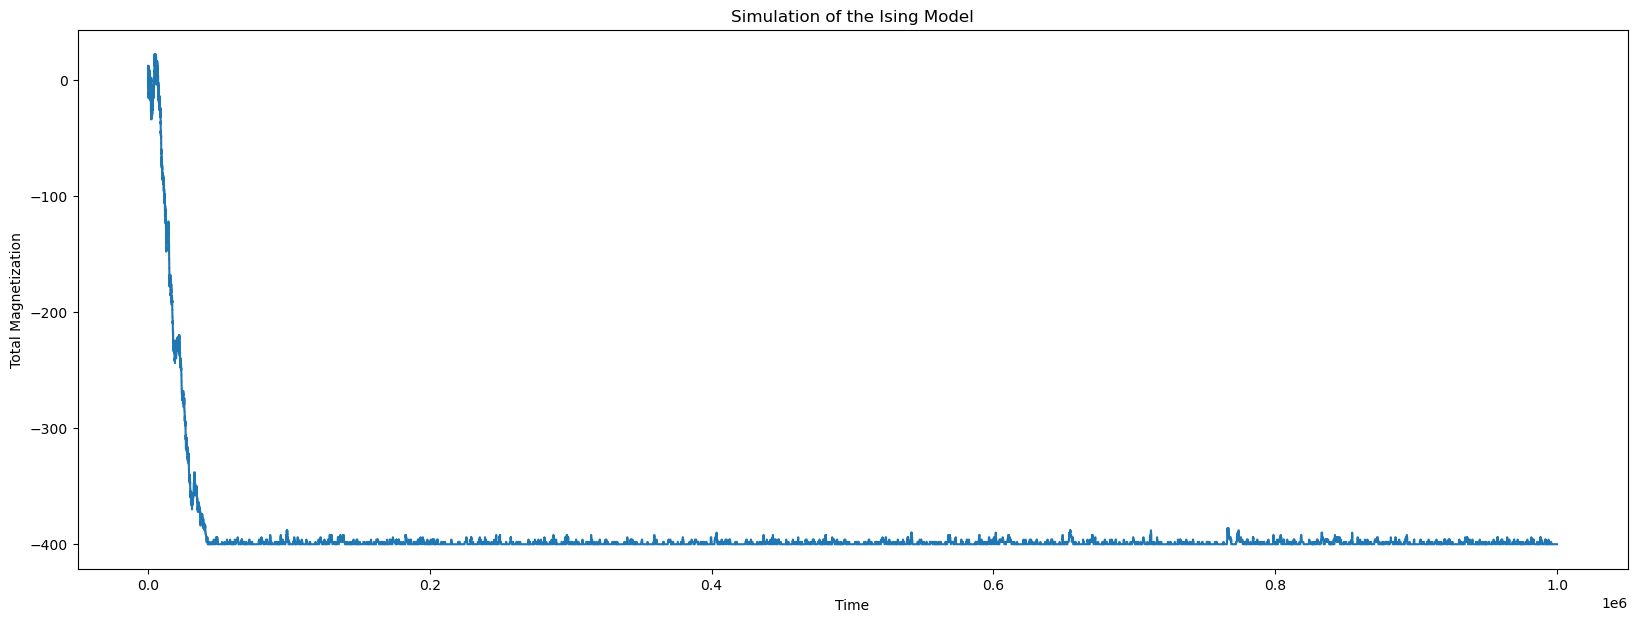

In [14]:
# Generate a new starting state with seed = 828
spin_init = new_state(L, 828)    # Generates an N by N array with elements randomly set to +1 or -1

spin_final, M_data = MCMC(spin_init, 1, 1, 1000000)

# Run MCMC method
plt.figure(figsize=(20,7))
plt.title(f"Simulation of the Ising Model")
plt.xlabel("Time")
plt.ylabel("Total Magnetization")
plt.plot(M_data)
plt.show()

#### The system above developed an overall negative magnetization. Almost all the 400 dipoles are lined up with negative spin.

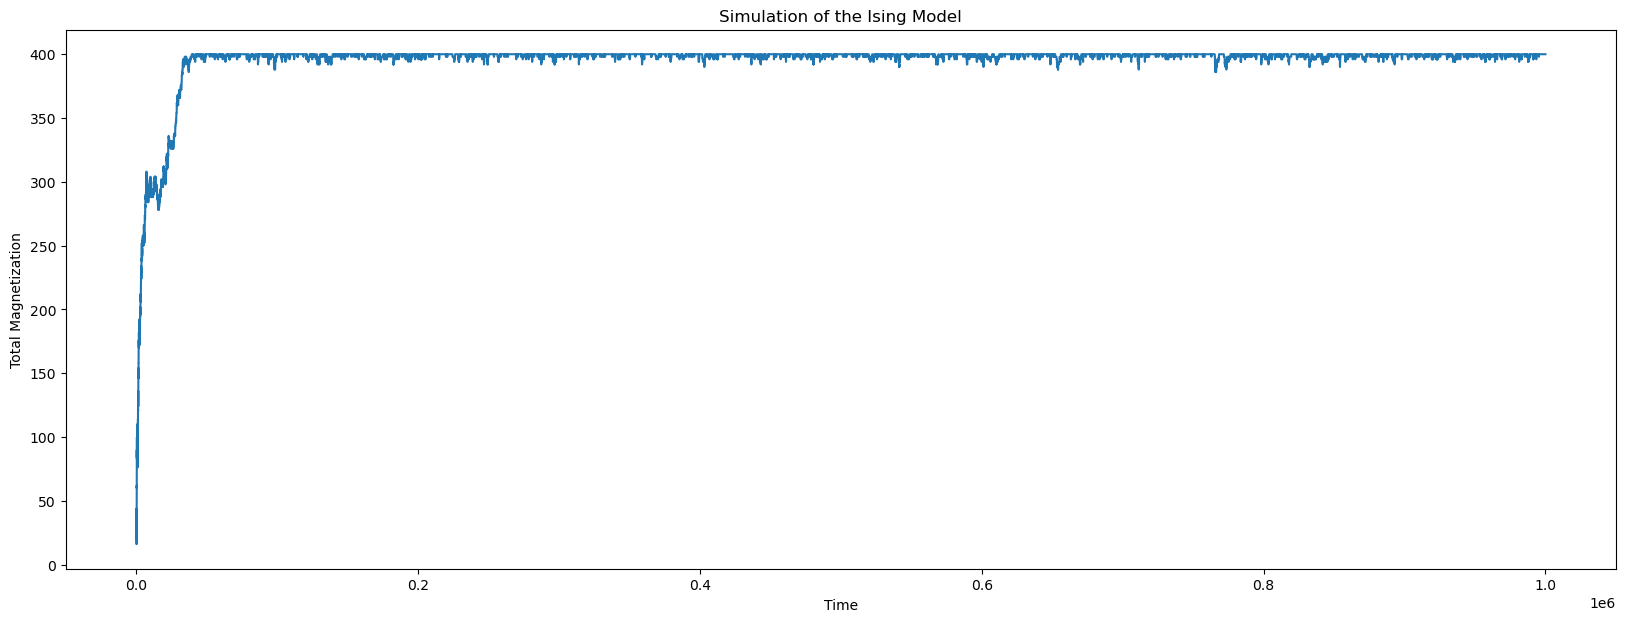

In [16]:
# Generate a new starting state with seed = 825
spin_init = new_state(L, 825)

# Run MCMC method with J = 1, T = 1, 1000000 steps, and RNG seed = 328
spin_final, M_data = MCMC(spin_init, 1, 1, 1000000)

plt.figure(figsize=(20,7))
plt.title(f"Simulation of the Ising Model")
plt.xlabel("Time")
plt.ylabel("Total Magnetization")
plt.plot(M_data)
plt.show()

#### The system above developed an overall positive magnetization. Almost all the 400 dipoles are lined up with positive spin.

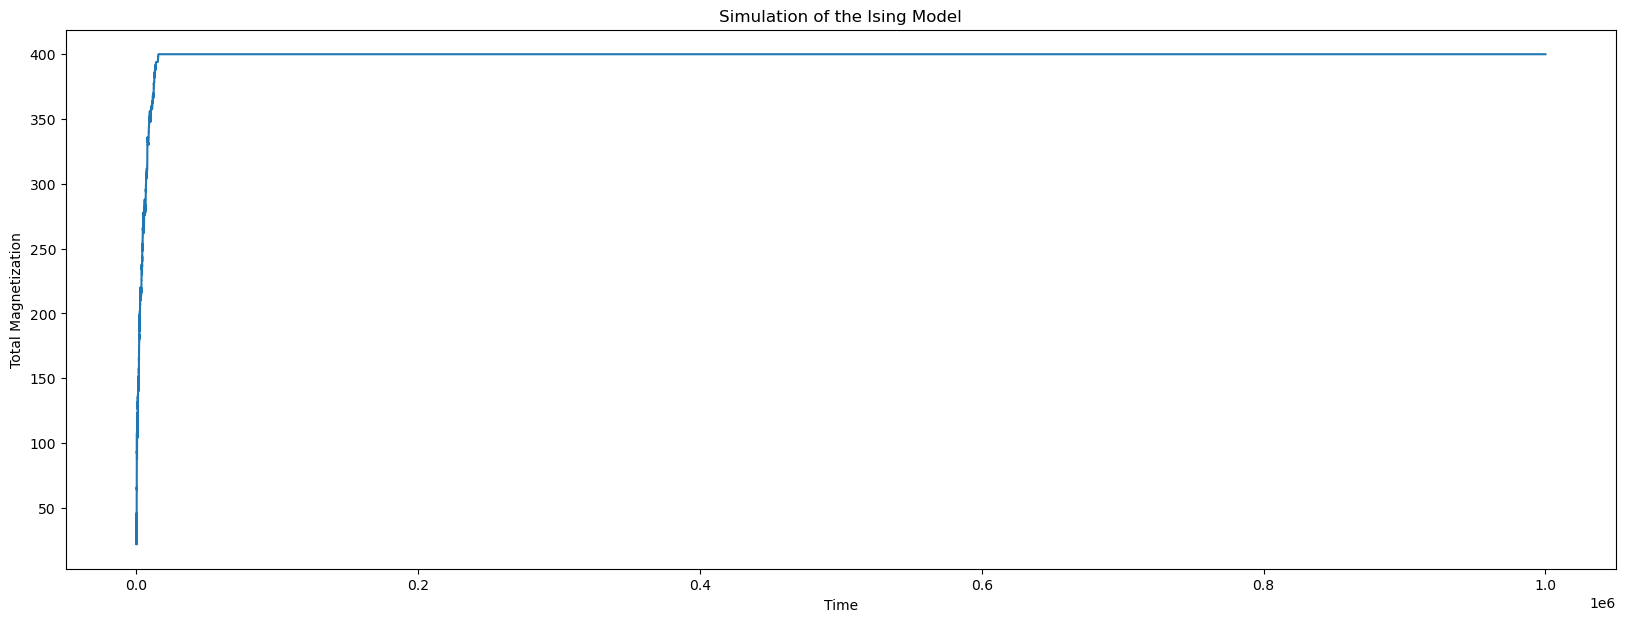

In [37]:
# Generate a new starting state with seed = 825
spin_init = new_state(L, 825)

# Run MCMC method with J = 1, T = 1, 1000000 steps, and RNG seed = 328
spin_final, M_data = MCMC(spin_init, 1, 0.1, 1000000)

plt.figure(figsize=(20,7))
plt.title(f"Simulation of the Ising Model")
plt.xlabel("Time")
plt.ylabel("Total Magnetization")
plt.plot(M_data)
plt.show()

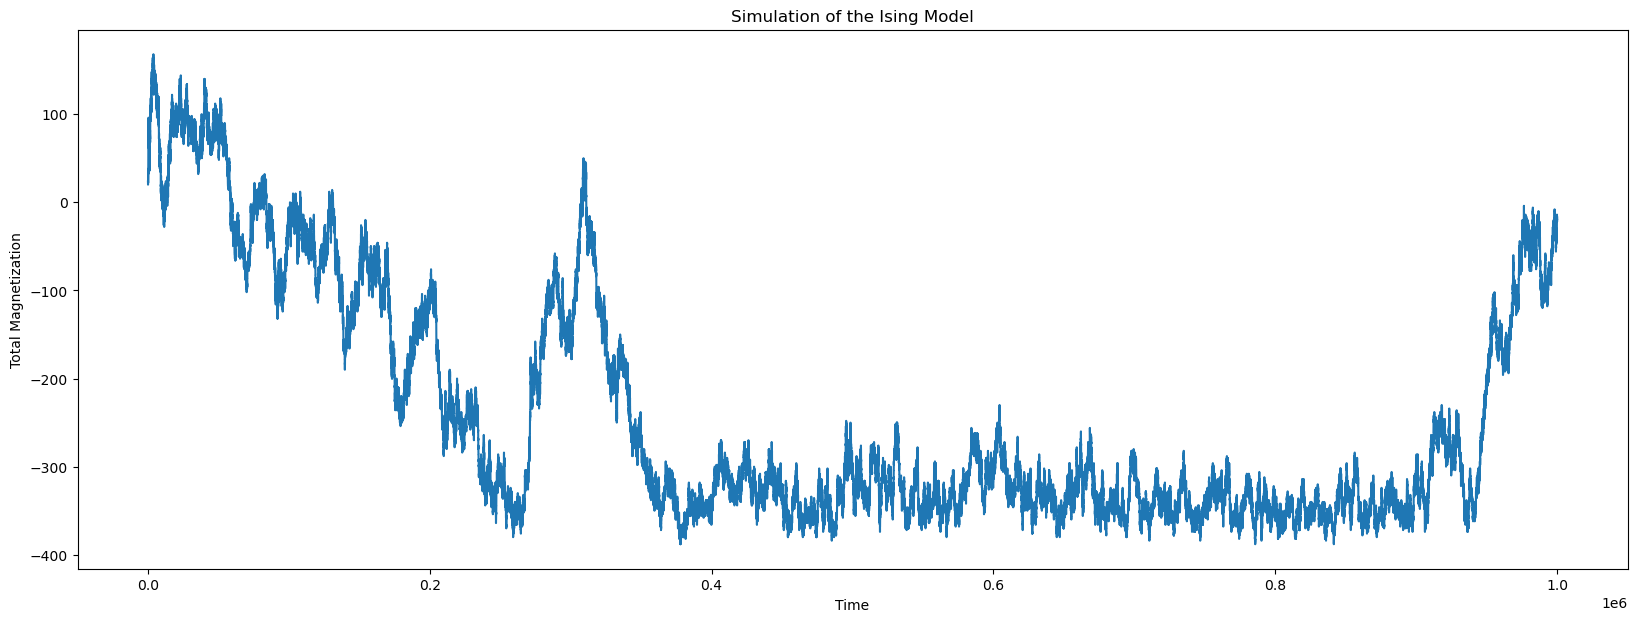

In [19]:
# Generate a new starting state with seed = 825
spin_init = new_state(L, 825)

# Run MCMC method with J = 1, T = 2, 1000000 steps, and RNG seed = 328
spin_final, M_data = MCMC(spin_init, 1, 2, 1000000)

plt.figure(figsize=(20,7))
plt.title(f"Simulation of the Ising Model")
plt.xlabel("Time")
plt.ylabel("Total Magnetization")
plt.plot(M_data)
plt.show()

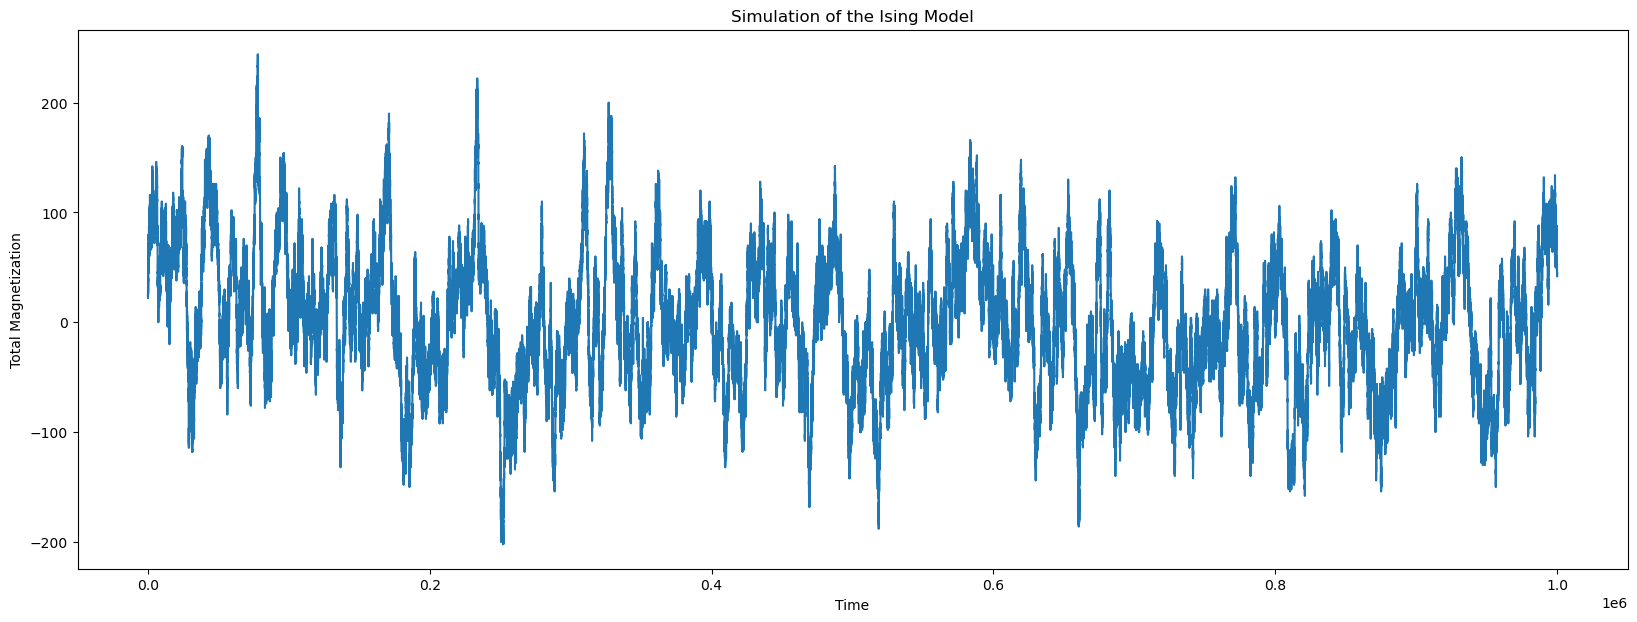

In [20]:
# Generate a new starting state with seed = 825
spin_init = new_state(L, 825)

# Run MCMC method with J = 1, T = 3, 1000000 steps, and RNG seed = 328
spin_final, M_data = MCMC(spin_init, 1, 3, 1000000)

plt.figure(figsize=(20,7))
plt.title(f"Simulation of the Ising Model")
plt.xlabel("Time")
plt.ylabel("Total Magnetization")
plt.plot(M_data)
plt.show()

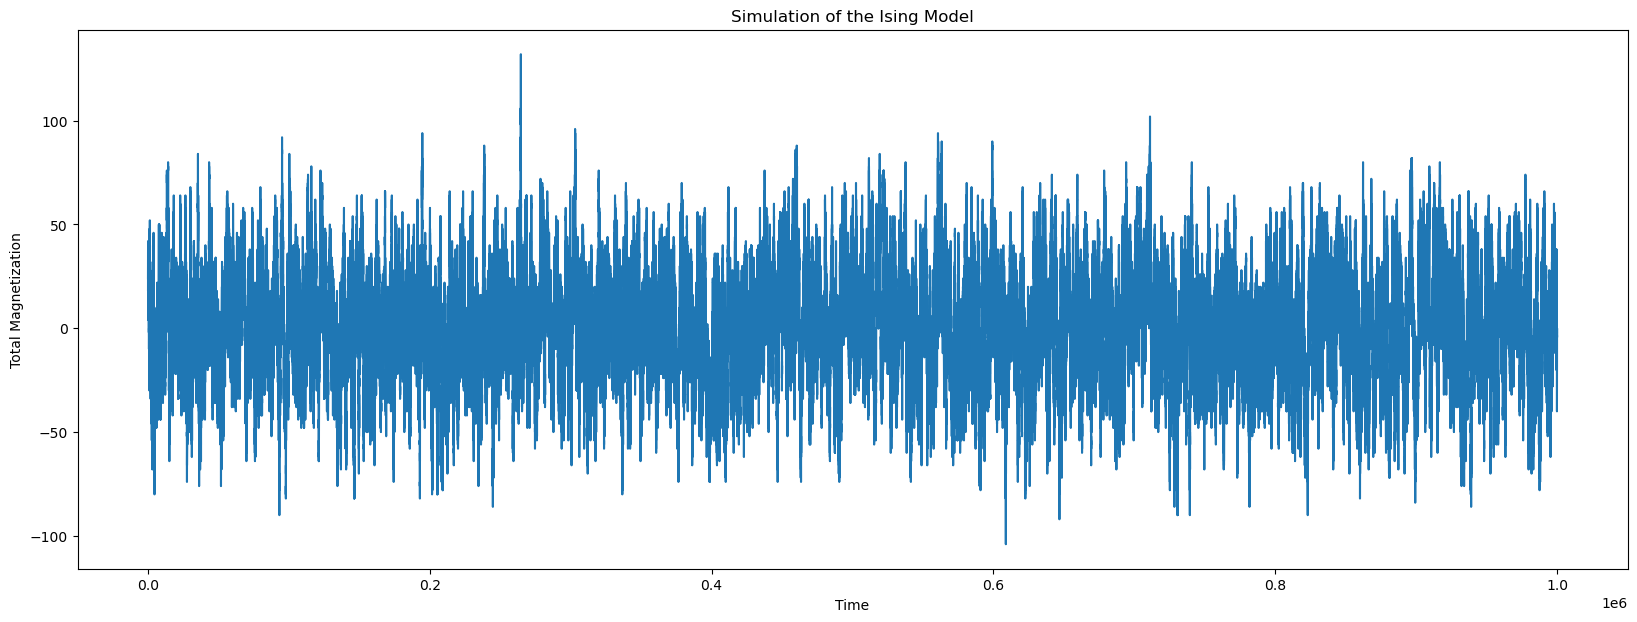

In [21]:
# Generate a new starting state with seed = 825
spin_init = new_state(L, 825)

# Run MCMC method with J = 1, T = 4, 1000000 steps, and RNG seed = 328
spin_final, M_data = MCMC(spin_init, 1, 8, 1000000)

plt.figure(figsize=(20,7))
plt.title(f"Simulation of the Ising Model")
plt.xlabel("Time")
plt.ylabel("Total Magnetization")
plt.plot(M_data)
plt.show()

### Discussing the Plots

We can observe from the plot, the thermodynamic behaviour of the Ising model with the spins aligning to the same direction or also known as the ferromagnetc interaction. In this simulation we use a Markov Chain Monte Carlo method and a square lattice system with the parameters J, K_B, and T beings set to 1. 

The First and Second plots shows that the system, after some time, was able to achieve thermal equilibrium with a total magnetization of $\pm$ 400 which means that the system is highly magnetized as we see that it is either aligned in the positive and negative directions and the total magnetization is in 400 because the lattice is 20 x 20 in size, so the total magnetization also depends on the size of the lattice of our system. 

This simulation of the Ising model allows us to study how the system goes from an ordered state to a disordered state by changing and experimenting with the Temperature (T) parameter, this is called the $\textbf{phase transitions}.$

**The initial conditions and its effect on the Magnetization**

Observing from the results we achieved, setting the spins randomly to $\pm$1 initially leads to the system evolving towards an equilibrium state after some time based on the changes of energy. Depending on the random state generated for the system from the start, the total magnetization and energy distribution might vary from each other. However, at equilibrium, these fluctuations should decrease as our system reaches thermal equilibrium, this can be seen in the plot above where our T = 1. However, changing the initial conditions to a uniform spins where we set all the spins initially facing the same direction will make the system quickly evolve to a lower energy distribution, so, the system will start in an ordered state which has a higher magnetization or non-zero. This will result on the system looking trapped but it will take less time to achieve equilibrium. Additionally, if the temperature is high enough, we can see that the system will go through different state of spin configuration and will result to a more disordered spin state. Therefore, changing the initial conditions affects the behaviour of the system on how fast it reaches equilibrium and we also found out that eventually, over time, the system will achieve equilibrium where the spontaneous magnetization happens regardless of the starting configuration due to ferromagnetic interaction with the excemption of a system with high enough temperature to make the system disordered, as the system will explode and there will be no observable data.

**Testing with different Temperature**

In the plots above, we have tried to experiment with different temperatures to see how the system will behave, at low temperatures close to 0, the system eventually achieves spin equilibrium over time being more ordered as the temperature decreases, this also means that the system stays in the configuration with the lowest energy. Also, at T = 0.1, the system shows less fluctuations showing that it is more ordered even in the state of equilibrum. 

Comparing the initial condition that the system starts at random state or we set it to all spins up or down. At random state, the system eventually achieves thermal equilibrium over time while in the all spins set to up or down, it will also have the same result but may take faster. These initial conditions will remain stable or aligned to where they are initially set since flipping a spin will increase the energy in the system.

We can also observe that as we increase the temperature, there are more fluctuations in the system showing that the system goes through all the possible configurations with the total magnetization being zero (on average as it goes back to the middle on most parts) as shown in the 5th and 6th plot. Since the system we have is now on a highly disordered state, the initial conditions will have very little impact on the behaviour of the system.


**Varying the interaction/coupling constant (J)** 

Looking at the equation for the total energy of the system as derived above, the value of the coupling constant (J) sets the strength of the interaction between neighboring spins in the 2D square lattice. The system greatly favors aligned spins for ferromagnetic interaction with coupling constant (J) larger than 0, which results in high magnetization and a more ordered state at low temperatures but even at high ones. This is because it requires energy to flip the spins in order to maintain the system's alignment or direction of rotation. The system will still maintain spin alignment because the coupling constant (J) is close to zero, but thermal fluctuations, particularly at high temperatures, could introduce some disorder. Furthermore, a highly disordered state will result from the system's behavior becoming more random as the interaction between the nearby spins weakens. In an antiferromagnetic interaction, where the nearby spins tend to anti-align, one spin prefers to be +1 while the other is -1, and vice versa, we get a coupling constant (J) less than 0.

<font color=red>Correctness of Code: 50/50 </font> \
<font color=red>Discussion of Code and Results: 50/50 </font>